In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import tushare as ts
import math
%matplotlib inline

In [3]:
#df_63 = ts.get_k_data('000063','2019-01-01','2019-12-31')
df_63 = pd.read_csv("601318.csv")

In [4]:
df_63.head()

,date,open,close,high,low,volume
0,2020年7月20日,79.05,81.87,82.70,79.05,112.36M
1,2020年7月17日,79.00,78.02,79.39,77.31,87.50M
2,2020年7月16日,81.30,78.22,81.95,78.16,131.82M
3,2020年7月15日,82.15,80.22,82.39,80.12,92.28M
4,2020年7月14日,82.37,81.30,83.23,80.61,98.86M


In [5]:
#计算收益率
df_63['d_return'] = df_63['close'].pct_change() 
# np.percentile方法计算分位数，前提是不能有空值；
VaR_5 = np.percentile(df_63.d_return.dropna(), 5)         
VaR_1 = np.percentile(df_63.d_return.dropna(), 1)

In [6]:
df_63

,date,open,close,high,low,volume,d_return
0,2020年7月20日,79.05,81.87,82.70,79.05,112.36M,NaN
1,2020年7月17日,79.00,78.02,79.39,77.31,87.50M,-0.047026
2,2020年7月16日,81.30,78.22,81.95,78.16,131.82M,0.002563
3,2020年7月15日,82.15,80.22,82.39,80.12,92.28M,0.025569
4,2020年7月14日,82.37,81.30,83.23,80.61,98.86M,0.013463
...,...,...,...,...,...,...,...
126,2020年1月8日,85.98,85.00,85.98,84.50,62.81M,-0.000470
127,2020年1月7日,86.01,86.15,86.46,85.67,45.22M,0.013529
128,2020年1月6日,85.92,85.60,86.87,85.50,63.65M,-0.006384
129,2020年1月3日,86.81,86.20,86.88,85.90,59.50M,0.007009


Text(0, 0.5, 'count')

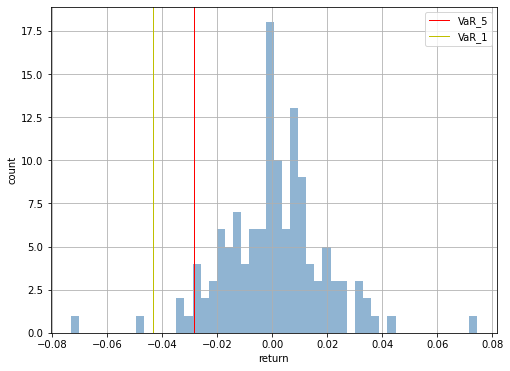

In [8]:
plt.figure(figsize= (8,6))
df_63.d_return.hist(bins=50, alpha=0.6, color='steelblue')
plt.axvline(VaR_5, color='r', linewidth=1,label = 'VaR_5')
plt.axvline(VaR_1, color='y', linewidth=1,label = 'VaR_1')
plt.legend()
plt.xlabel('return')
plt.ylabel('count')

In [9]:
#先用历史数据计算出每天的收益率均值μ和每天的波动率σ，
#99%的VaR(daily)=μ_(1-day)-2.33*σ_(1-day)，
#2.33是99%VaR单尾检验的Z值。如果求10天99%的VaR，
#就要先计算这10天的收益率均值和10天的波动率。
#99%的10-dayVaR = μ_(1-day)10-2.33σ_(1-day)*√10
mean_return = df_63['d_return'].mean()
std = df_63['d_return'].std()
var1_1day = mean_return-2.33*std
var5_1day = mean_return-1.645*std
var1_5day = 5*mean_return-2.33*std*math.sqrt(5)
var5_5day = 5*mean_return-1.645*std*math.sqrt(5)
var1_10day = 10*mean_return-2.33*std*math.sqrt(10)
var5_10day = 10*mean_return-1.645*std*math.sqrt(10)
var1_20day = 20*mean_return-2.33*std*math.sqrt(20)
var5_20day = 20*mean_return-1.645*std*math.sqrt(20)
print("000063的1日VaR【1%置信度】:",var1_1day)
print("000063的1日VaR【5%置信度】:",var5_1day)
print("000063的5日VaR【1%置信度】:",var1_5day)
print("000063的5日VaR【5%置信度】:",var5_5day)
print("000063的10日VaR【1%置信度】:",var1_10day)
print("000063的10日VaR【5%置信度】:",var5_10day)
print("000063的20日VaR【1%置信度】:",var1_20day)
print("000063的20日VaR【5%置信度】:",var5_20day)

000063的1日VaR【1%置信度】: -0.043168080567507025
000063的1日VaR【5%置信度】: -0.030311147624181477
000063的5日VaR【1%置信度】: -0.09496718443089983
000063的5日VaR【5%置信度】: -0.06621820838746745
000063的10日VaR【1%置信度】: -0.13265119891985058
000063的10日VaR【5%置信度】: -0.0919940070948893
000063的20日VaR【1%置信度】: -0.18429176201207395
000063的20日VaR【5%置信度】: -0.1267938099252092


In [10]:
df_63.head()

,date,open,close,high,low,volume,d_return
0,2020年7月20日,79.05,81.87,82.70,79.05,112.36M,NaN
1,2020年7月17日,79.00,78.02,79.39,77.31,87.50M,-0.047026
2,2020年7月16日,81.30,78.22,81.95,78.16,131.82M,0.002563
3,2020年7月15日,82.15,80.22,82.39,80.12,92.28M,0.025569
4,2020年7月14日,82.37,81.30,83.23,80.61,98.86M,0.013463


In [11]:
df_63_1= df_63.drop(columns=['date','open','high','low','volume','d_return'])#code

In [12]:
df_63_1.head()

,close
0,81.87
1,78.02
2,78.22
3,80.22
4,81.30


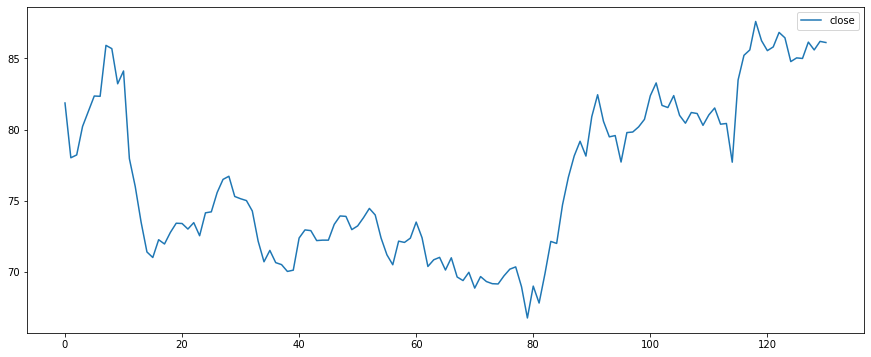

In [13]:
df_63_1.plot(figsize=(15,6))
plt.show()

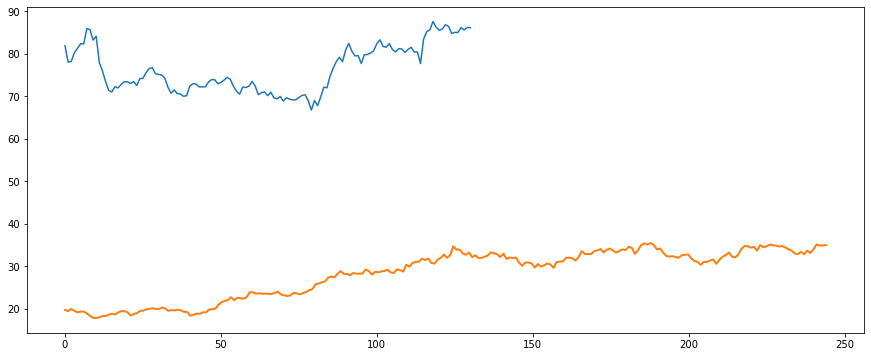

In [14]:

plt.figure(figsize=(15,6))

plt.plot(df_63_1)

T = 244
mean_return = df_63['d_return'].mean()
sigma = df_63['d_return'].std()
S0 = 19.56
dt = 1
N = round(T/dt)
t = np.linspace(0,T,N) 

W = np.random.standard_normal(size=N)
W = np.cumsum(W)*np.sqrt(dt)
X = (mean_return-0.5*sigma**2)*t +sigma*W
S = S0*np.exp(X)
plt.plot(t,S,lw=2)

plt.show()